# Can You Solve the Tricky Mathematical Treat? (2024.10.25)

link: https://thefiddler.substack.com/p/can-you-solve-the-tricky-mathematical

## I. Puzzle

You ring the doorbell, and someone dressed as a mathematician answers. (What does a “mathematician” costume look like? Look in the mirror!) They present you with a giant bag from which to pick candy, and inform you that the bag contains exactly three peanut butter cups (your favorite!), while the rest are individual kernels of candy corn (not your favorite!).

You have absolutely no idea how much candy corn is in the bag—any whole number of kernels (including zero) seems equally possible in this monstrous bag.

You reach in and pull out a candy at random (that is, each piece of candy is equally likely to be picked, whether it’s a peanut butter cup or a kernel of candy corn). You remove your hand from the bag to find that you’ve picked a peanut butter cup. Huzzah!

You reach in again and pull a second candy at random. It’s another peanut butter cup! You reach in one last time and pull a third candy at random. It’s the third peanut butter cup!

At this point, whatever is left in the bag is just candy corn. How many candy corn kernels do you expect to be in the bag?

# II. Solution

We start with the probability $P$ that we draw 3 peanut butter cups from a bag with $C$ candies. 

The probability is hypergeometric distributed as we draw $n$ times without replacement from a bag with $B$ peanut butter cups and $1-B$ candy corns and we measure the numbers of successes $y$.

$$P(y\,|\,C, B,n)= \frac{\binom{B}{Y}\binom{C-B}{n-y}}{\binom{C}{N}}$$

With $n=3$, $B=3$ and $y=3$ we get

$$P(y=3\,|\,C)= \binom{C}{3}^{-1}\:\text{ with } C\geq 3\tag{1}$$


In [1]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt

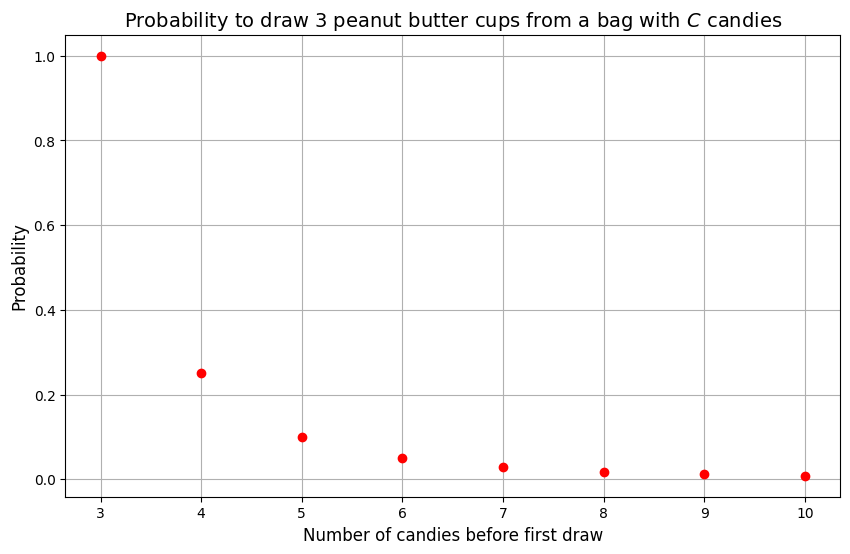

In [2]:
B = np.arange(3, 11) 
P = [1 / comb(B, 3) for B in B]

plt.figure(figsize=(10, 6))
plt.plot(B,P,"ro")

plt.grid(True)
plt.title("Probability to draw 3 peanut butter cups from a bag with $C$ candies", fontsize=14)
plt.xlabel("Number of candies before first draw", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.show()

Equation (1) gives us the probability $P$ that we draw 3 peanut butter cups given that there are $C$ candies in the bag. To get the probability that there are $C$ candies in the bag given that we have drawn 3 peanut butter cups we use the Bayes theorem.

We label all possible bags $G_i$ where the number of cookies in a bag is $i+2$  with $i \geq 1$.

According to the Bayes theorem the probability $P_{i}$ that the cookies came from a bag $G_j$ where $1 \leq j \leq i$ and given that we have drawn 3 peanut butter cups is:

$$P_{i}(G_j\,|\,y=3)= \frac{P(y=3\,|\,G_j)\cdot P(G_i)}{P(y=3)}\tag{2}$$

The likelihood $P(3\,|\,G_j)$ is derived from equation (1) and $C = j+2$
$$P(y=3\,|\,G_j)= \binom{j+2}{3}^{-1}\tag{3}$$

Before we draw any cookie we assume that all bag sizes are equally likely so that $$P(G_i)= 1 / i\tag{4}$$

$P(y=3)$ gives us the total probability for all possible bags. It can be computed using the law of total probability:

$$P(y=3) = \sum_{k=1}^{i} P(G_k)\cdot P(y=3\,|\,G_k) = \frac{1}{i} \sum_{k=1}^{i} \binom{k+2}{3}^{-1} \tag{5}$$

Putting (3), (4) and (5) into (2) we get

$$P_{i}(G_j\,|\,y=3)=\frac{1}{\binom{j+2}{3} \sum_i \binom{i+2}{3}^{-1}}\tag{6}$$

In [3]:
import pandas as pd

In [31]:
n_bags = 5_000
table = pd.DataFrame()
table['Bag']= np.arange(n_bags) + 1
table['Prior'] = 1 / n_bags

def get_likelihood(row):
	return 1/comb(int(row['Bag']) + 2, 3)

table['Likelihood'] = table.apply(get_likelihood,axis=1)
table['Unnorm'] = table['Prior'] * table['Likelihood']

prob_data = table['Unnorm'].sum()
table['Posterior'] = table['Unnorm'] / prob_data

table.head()

,Bag,Prior,Likelihood,Unnorm,Posterior
0,1,0.0002,1.000000,0.000200,0.666667
1,2,0.0002,0.250000,0.000050,0.166667
2,3,0.0002,0.100000,0.000020,0.066667
3,4,0.0002,0.050000,0.000010,0.033333
4,5,0.0002,0.028571,0.000006,0.019048


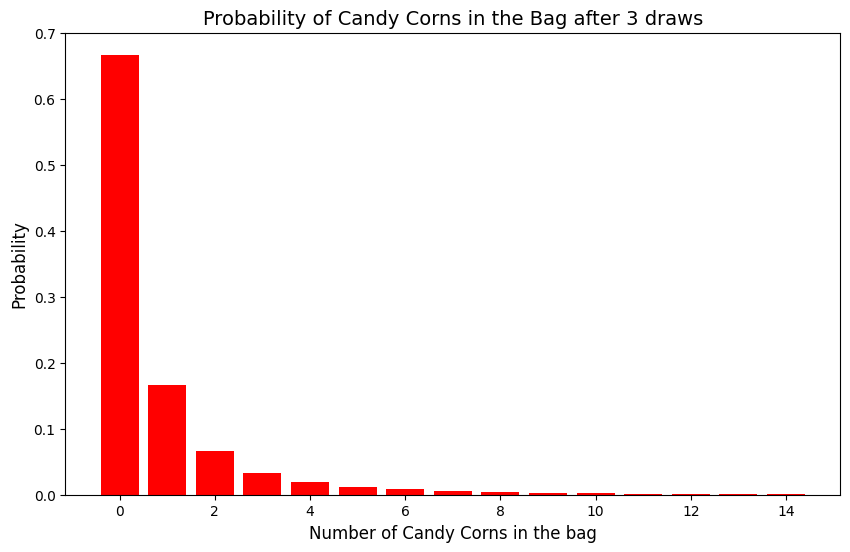

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(table['Bag'][:15]-1,table['Posterior'][:15],color = 'red')
plt.title("Probability of Candy Corns in the Bag after 3 draws", fontsize=14)
plt.xlabel("Number of Candy Corns in the bag", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.show()

**Solution** It is most likely that there are no candy corns in the bag with a probability of 0.667.  

In [10]:
sum(table['Posterior'] * table['Bag'])-1

0.9999866667999984

On average the will be 1 candy corn in the bag.

## Scratch Pad

In [17]:
import numpy as np
import pandas as pd
from collections import Counter

In [26]:
# Monte Carlo

bags = 500
trials = 2_000_000
success = []

base_bag = np.ones(3)

for trial in range(trials):
	bag_number_picked = np.random.choice(np.arange(bags)) 
	bag = np.concatenate((base_bag, np.zeros(bag_number_picked)))
	if sum(np.random.choice(bag,3,replace = False)) == 3:
			success.append(bag_number_picked)

print(len(success))
for i in range(11):
	print(f'{i}: {Counter(success)[i]/len(success):.3f}') 


5923
0: 0.671
1: 0.161
2: 0.067
3: 0.031
4: 0.020
5: 0.012
6: 0.009
7: 0.005
8: 0.004
9: 0.003
10: 0.003
